In [5]:
import pandas as pd

df = pd.read_csv("weight-height (2).csv")
print(df.head())

  Gender     Height      Weight
0   Male  73.847017  241.893563
1   Male  68.781904  162.310473
2   Male  74.110105  212.740856
3   Male  71.730978  220.042470
4   Male  69.881796  206.349801


In [6]:
import os
print(os.getcwd())   # shows where Python is looking

C:\Users\Bipas\Desktop\Bipasa\Metropolia\Artificial Intillegence\Assignment 5


In [7]:
df['Height'] = df['Height'] * 2.54   # inches → cm
df['Weight'] = df['Weight'] * 0.4536 # pounds → kg

In [8]:
from sklearn.model_selection import train_test_split

X = df[['Height']]
y = df['Weight']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [9]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Normalization (0–1 range)
norm = MinMaxScaler()
X_train_norm = norm.fit_transform(X_train)
X_test_norm = norm.transform(X_test)

# Standardization (mean=0, std=1)
std = StandardScaler()
X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)

In [10]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print("R² score (unscaled):", r2_score(y_test, y_pred))

R² score (unscaled): 0.8346485438169171


In [11]:
knn_norm = KNeighborsRegressor(n_neighbors=5)
knn_norm.fit(X_train_norm, y_train)

y_pred_norm = knn_norm.predict(X_test_norm)

print("R² score (normalized):", r2_score(y_test, y_pred_norm))

R² score (normalized): 0.8346485438169171


In [12]:
knn_std = KNeighborsRegressor(n_neighbors=5)
knn_std.fit(X_train_std, y_train)

y_pred_std = knn_std.predict(X_test_std)

print("R² score (standardized):", r2_score(y_test, y_pred_std))

R² score (standardized): 0.8346485438169171


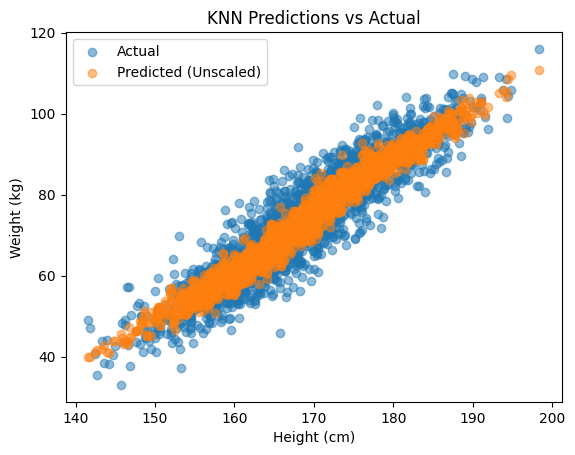

In [13]:
import matplotlib.pyplot as plt

plt.scatter(X_test, y_test, label="Actual", alpha=0.5)
plt.scatter(X_test, y_pred, label="Predicted (Unscaled)", alpha=0.5)
plt.xlabel("Height (cm)")
plt.ylabel("Weight (kg)")
plt.title("KNN Predictions vs Actual")
plt.legend()
plt.show()